In [1]:
import pandas as pd
import numpy as np
import random
from datetime import datetime, timedelta

# Seed for reproducibility
random.seed(42)
np.random.seed(42)

# Generate synthetic data
n_samples = 1000
start_date = datetime(2023, 1, 1)
date_range = [start_date + timedelta(days=i) for i in range(365)]

data = {
    "Date": np.random.choice(date_range, n_samples),
    "Time": [f"{random.randint(0, 23):02}:{random.randint(0, 59):02}" for _ in range(n_samples)],
    "Road_Condition": np.random.choice(["Dry", "Wet", "Snowy", "Icy"], n_samples),
    "Weather_Condition": np.random.choice(["Clear", "Rain", "Fog", "Snow"], n_samples),
    "Accident_Severity": np.random.choice(["Minor", "Moderate", "Severe"], n_samples),
    "Latitude": np.random.uniform(-90, 90, n_samples),
    "Longitude": np.random.uniform(-180, 180, n_samples)
}

df = pd.DataFrame(data)
print(df.head())


        Date   Time Road_Condition Weather_Condition Accident_Severity  \
0 2023-04-13  20:07          Snowy             Clear             Minor   
1 2023-12-15  00:47          Snowy              Snow            Severe   
2 2023-09-28  08:15            Dry               Fog          Moderate   
3 2023-04-17  07:08            Wet             Clear          Moderate   
4 2023-03-13  23:06            Wet               Fog             Minor   

    Latitude   Longitude  
0 -20.836868   89.221887  
1  -8.977795 -125.781083  
2  14.267944 -101.796881  
3  46.683185  -12.963553  
4 -72.202749  -84.958434  


In [2]:
# Convert date and time columns to appropriate formats
df['Date'] = pd.to_datetime(df['Date'])
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M').dt.time

# Extract additional features
df['Hour'] = pd.to_datetime(df['Time'], format='%H:%M:%S').dt.hour
df['DayOfWeek'] = df['Date'].dt.day_name()


In [3]:
# Analyze number of accidents by road condition
road_condition_counts = df['Road_Condition'].value_counts()
print("Number of accidents by road condition:\n", road_condition_counts)

Number of accidents by road condition:
 Road_Condition
Dry      266
Snowy    256
Wet      251
Icy      227
Name: count, dtype: int64


In [4]:
# Analyze number of accidents by weather condition
weather_condition_counts = df['Weather_Condition'].value_counts()
print("Number of accidents by weather condition:\n", weather_condition_counts)

Number of accidents by weather condition:
 Weather_Condition
Rain     269
Clear    253
Snow     249
Fog      229
Name: count, dtype: int64


In [5]:
# Analyze number of accidents by hour of the day
hourly_accidents = df['Hour'].value_counts().sort_index()
print("Number of accidents by hour of the day:\n", hourly_accidents)

Number of accidents by hour of the day:
 Hour
0     42
1     39
2     43
3     46
4     37
5     30
6     30
7     46
8     56
9     41
10    38
11    37
12    32
13    52
14    45
15    40
16    24
17    63
18    39
19    37
20    47
21    61
22    29
23    46
Name: count, dtype: int64


In [6]:
# Analyze number of accidents by road condition
road_condition_counts = df['Road_Condition'].value_counts()
print("Number of accidents by road condition:\n", road_condition_counts)

# Analyze number of accidents by weather condition
weather_condition_counts = df['Weather_Condition'].value_counts()
print("Number of accidents by weather condition:\n", weather_condition_counts)

# Analyze number of accidents by hour of the day
hourly_accidents = df['Hour'].value_counts().sort_index()
print("Number of accidents by hour of the day:\n", hourly_accidents)


Number of accidents by road condition:
 Road_Condition
Dry      266
Snowy    256
Wet      251
Icy      227
Name: count, dtype: int64
Number of accidents by weather condition:
 Weather_Condition
Rain     269
Clear    253
Snow     249
Fog      229
Name: count, dtype: int64
Number of accidents by hour of the day:
 Hour
0     42
1     39
2     43
3     46
4     37
5     30
6     30
7     46
8     56
9     41
10    38
11    37
12    32
13    52
14    45
15    40
16    24
17    63
18    39
19    37
20    47
21    61
22    29
23    46
Name: count, dtype: int64


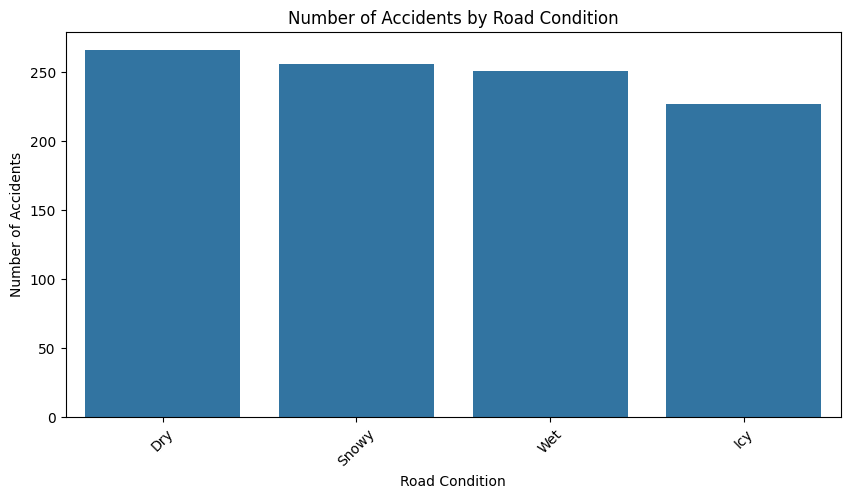

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize number of accidents by road condition
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Road_Condition', order=road_condition_counts.index)
plt.xlabel('Road Condition')
plt.ylabel('Number of Accidents')
plt.title('Number of Accidents by Road Condition')
plt.xticks(rotation=45)
plt.show()


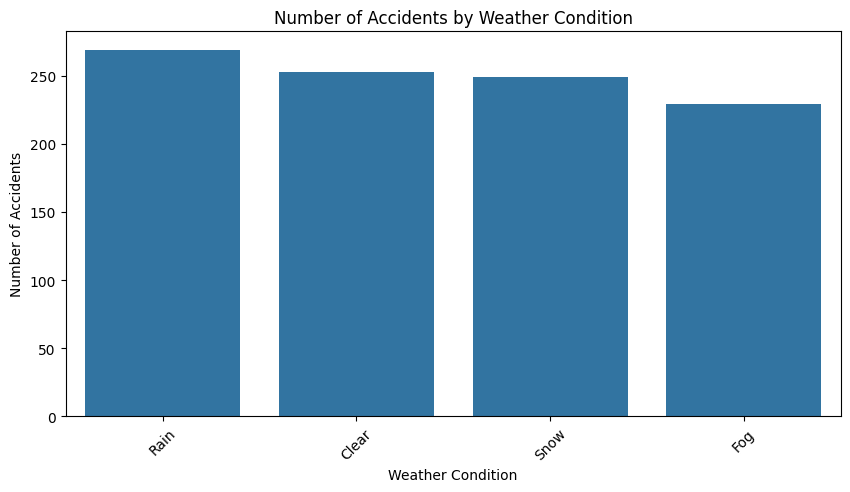

In [8]:
# Visualize number of accidents by weather condition
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Weather_Condition', order=weather_condition_counts.index)
plt.xlabel('Weather Condition')
plt.ylabel('Number of Accidents')
plt.title('Number of Accidents by Weather Condition')
plt.xticks(rotation=45)
plt.show()

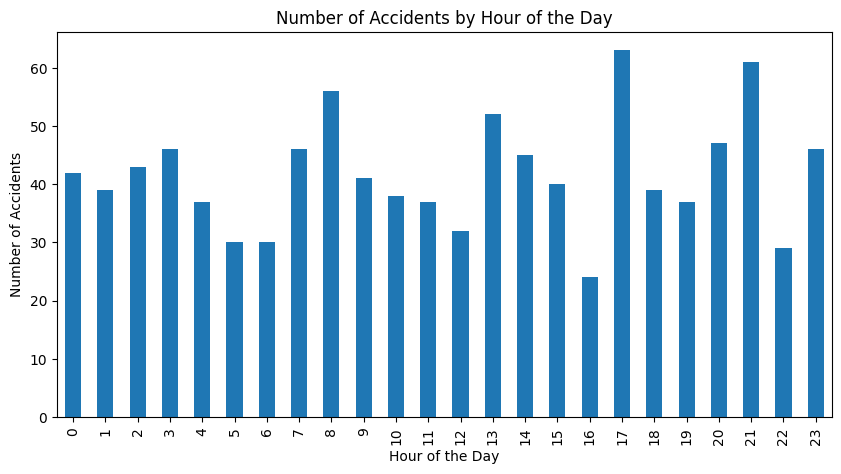

In [9]:
# Visualize number of accidents by hour of the day
plt.figure(figsize=(10, 5))
hourly_accidents.plot(kind='bar')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Accidents')
plt.title('Number of Accidents by Hour of the Day')
plt.show()

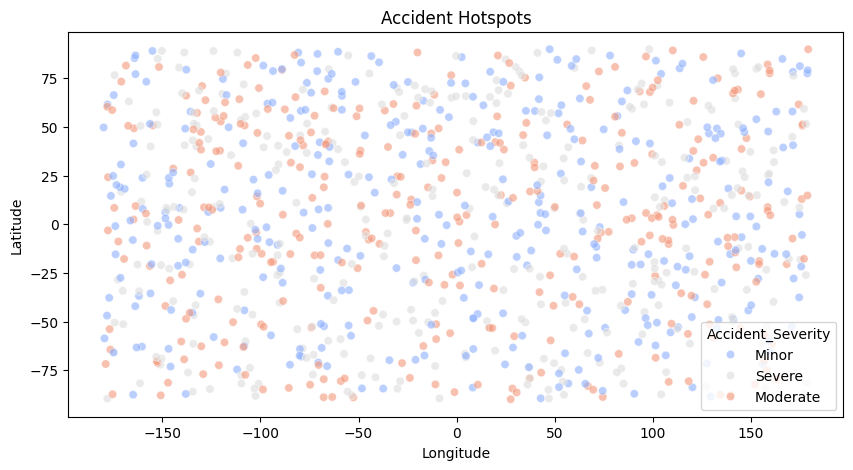

In [10]:
# Visualize accident hotspots
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='Longitude', y='Latitude', hue='Accident_Severity', palette='coolwarm', alpha=0.6)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Accident Hotspots')
plt.show()